<a href="https://colab.research.google.com/github/Skantastico/DS-Unit-2-Applied-Modeling/blob/master/LS_DSPT3_231_assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/Skantastico/DS-Unit-2-Applied-Modeling/master/data/anime.csv'

df = pd.read_csv(url)

# My Dataset:

Anime Ratings from the "IMDB" of Anime

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
# Summary of numeric Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [6]:
# Summary of non-numeric

df.describe(exclude='number').T

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


### There are at least 800 'adult content' with genre of Hentai, which I will probably remove (perhaps inappropriate for school project, but if they affect the model I'll make sure to note it) 

## Choose Your Target

In [9]:
# My Target will be involving the Rating column

df.rating.value_counts(ascending=False)

6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.35      1
3.14      1
3.28      1
8.66      1
2.80      1
Name: rating, Length: 598, dtype: int64

### Some exploration

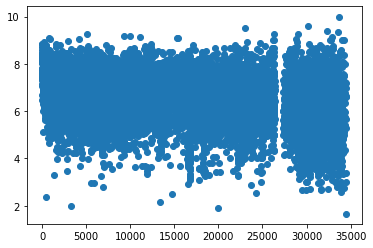

In [12]:
x = df.anime_id
y = df.rating

plt.scatter(x,y)

In [22]:
df['Good'] = df['rating'] >= 7.5
df['Good'].value_counts()

False    10541
True      1753
Name: Good, dtype: int64

In [23]:
df['Average'] = df['rating'] >= 6.0

df['Average'].value_counts()

True     8705
False    3589
Name: Average, dtype: int64

## I don't really want to turn it into a classification (like the great burritos example in class), so I will stick with the entire 'rating' set as regression.

### How is my target distributed?

In [25]:
df['rating'].describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [27]:
df['mean'] = df['rating'] >= 6.47
df['mean'].value_counts(normalize=True)

True     0.534407
False    0.465593
Name: mean, dtype: float64

## So there are about 6570 (54%) anime that are above average (before cleaning).

## Which Observations will I use to train?

-Episodes (# in series)

-Genre

-Members

## I can either create or modify existing features to create new ones, for example:

- "popularity", bin members (meaning number of people who voted) into popular/not popular bins

- "length", bin number of episodes into how long the series as a whole is. A good amount are one-offs meaning just one movie length or shorter episode, while most are in a series of several 20ish minute episodes, sometimes ranging into the 3 digits.

In [0]:
## Possible stretch goal: convert target into multivariable: 
## "What percentage of anime is truly "must watch", aka very popular and very highly rated"

## Clean the Dataset